<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/60_40_Equities_and_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from my_library import *

Risk Asset:  QQQ
Alternative: GLD


[*********************100%***********************]  2 of 2 completed
/tmp/ipython-input-289164094.py:2: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  data.index=pd.DatetimeIndex(data.index).to_period('B')


Price            Close                    High                     Low  \
Ticker             GLD         QQQ         GLD         QQQ         GLD   
Date                                                                     
2004-11-19   44.779999   32.682861   44.919998   33.198284   44.470001   
2004-11-22   44.950001   32.995495   44.970001   33.012394   44.740002   
2004-11-23   44.750000   32.944778   44.919998   33.079971   44.720001   
2004-11-24   45.049999   33.232082   45.049999   33.282778   44.790001   
2004-11-26   45.290001   33.130676   45.599998   33.358814   45.060001   
...                ...         ...         ...         ...         ...   
2026-02-10  462.399994  611.469971  466.750000  617.020020  459.519989   
2026-02-11  467.630005  613.109985  468.609985  617.520020  462.820007   
2026-02-12  451.390015  600.640015  466.380005  615.809998  448.059998   
2026-02-13  462.619995  601.919983  463.839996  606.479980  456.250000   
2026-02-17  448.200012  601.299988  451.369995  603.950012  445.529999   

Price                         Open                Return            \
Ticker             QQQ         GLD         QQQ       GLD       QQQ   
Date                                                                 
2004-11-19   32.606815   44.490002   33.156037  0.901302 -1.552491   
2004-11-22   32.513871   44.750000   32.623716  0.379638  0.956567   
2004-11-23   32.623695   44.880001   32.961675 -0.444941 -0.153707   
2004-11-24   33.012392   44.930000   33.029292  0.670389  0.872077   
2004-11-26   33.096877   45.250000   33.265869  0.532745 -0.305145   
...                ...         ...         ...       ...       ...   
2026-02-10  611.010010  465.959991  615.309998 -0.991372 -0.463934   
2026-02-11  607.690002  466.000000  616.380005  1.131058  0.268209   
2026-02-12  599.570007  464.899994  614.710022 -3.472829 -2.033888   
2026-02-13  596.419983  459.730011  600.429993  2.487866  0.213101   
2026-02-17  593.340027  450.260010  598.380005 -3.117025 -0.103003   

Price           Volume            Weight         Return   Cumulative  \
Ticker             GLD        QQQ    GLD  QQQ Portfolio          QQQ   
Date                                                                   
2004-11-19  11655300.0  118448900    0.4  0.6 -0.570974    -1.552491   
2004-11-22  11996000.0   79882600    0.4  0.6  0.725796    -0.610774   
2004-11-23   3169200.0   91925300    0.4  0.6 -0.270200    -0.763542   
2004-11-24   6105100.0   74051700    0.4  0.6  0.791402     0.101876   
2004-11-26   3097700.0   31248900    0.4  0.6  0.030011    -0.203580   
...                ...        ...    ...  ...       ...          ...   
2026-02-10   7861600.0   53938900    0.4  0.6 -0.674909  1741.873482   
2026-02-11  11209600.0   58575100    0.4  0.6  0.613348  1746.813544   
2026-02-12  20488800.0   81378900    0.4  0.6 -2.609464  1709.251424   
2026-02-13  12359300.0   69237500    0.4  0.6  1.123007  1713.106952   
2026-02-17  10906500.0   68730900    0.4  0.6 -1.308612  1711.239399   

Price                                
Ticker             GLD    Portfolio  
Date                                 
2004-11-19    0.901302    -0.570974  
2004-11-22    1.284362     0.150678  
2004-11-23    0.833706    -0.119930  
2004-11-24    1.509685     0.670523  
2004-11-26    2.050473     0.700735  
...                ...          ...  
2026-02-10  941.910732  1677.284646  
2026-02-11  953.695344  1688.185590  
2026-02-12  917.102307  1641.523524  
2026-02-13  942.406453  1661.080955  
2026-02-17  909.914379  1638.035239  

[5343 rows x 18 columns]

15:31:35 Mean-Variance Optimal Fully Invested Portfolio is 32:68.


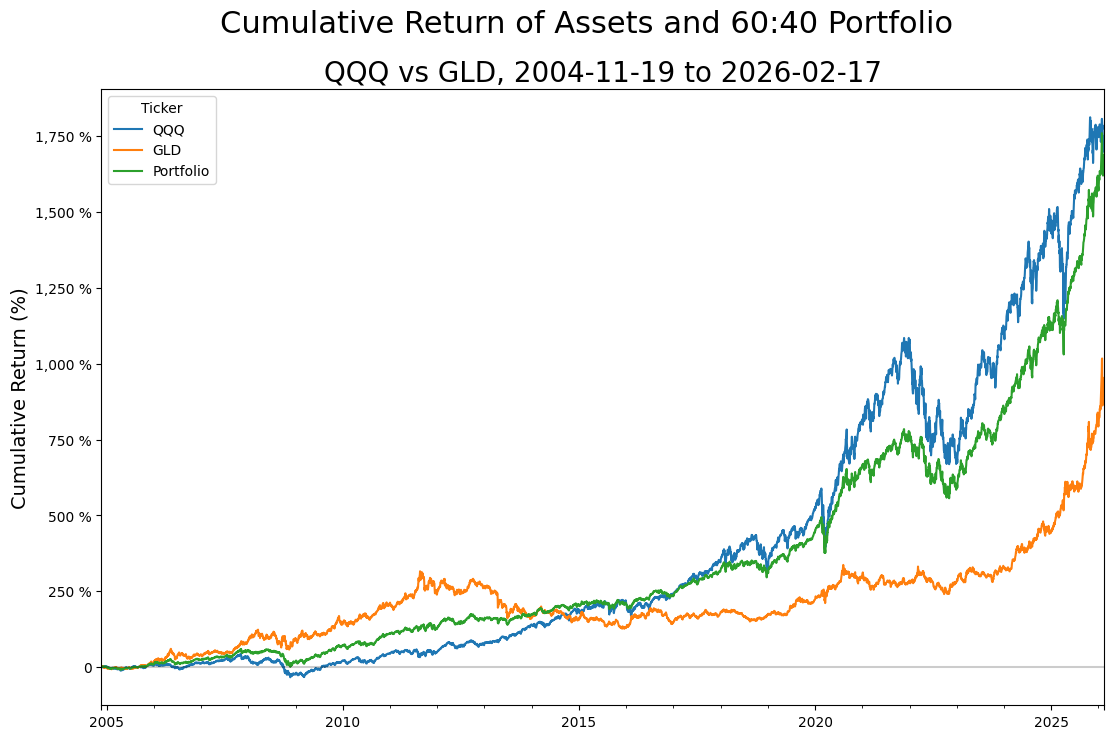

In [11]:
data=download(tickers:=[(market:=input("Risk Asset:  ")),(alternative:=input("Alternative: "))],"1990-01-01",today("%Y-%m-%d"),auto_adjust=True)
data.index=pd.DatetimeIndex(data.index).to_period('B')

if False and ((resample:=input("Resample: "))[0] not in ('','D','B')):
    data=data.resample(resample).last()
    nprint("Resampled data to '%s' periodicity." % resample)

for ticker in tickers:
    data[('Return',ticker)]=data[('Close',ticker)].pct_change()*hundred
    data[('Weight',ticker)]=0.6 if ticker==market else 0.4

data.dropna(inplace=True)
data.sort_index(axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)

for ticker in tickers+['Portfolio']:
    data[('Cumulative',ticker)]=(data[('Return',ticker)]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and 60:40 Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

display(data)

s1,s12,s12,s2=data['Return'][tickers].cov().to_numpy().reshape(4)
w1=(s2**2-s12)/(s1**2+s2**2-two*s12)
w2=one-w1
nprint("Mean-Variance Optimal Fully Invested Portfolio is %.0f:%0.f." % (w1*hundred,w2*hundred))

In [12]:
from warnings import filterwarnings ; filterwarnings('ignore',category=pd.errors.PerformanceWarning)

report=pd.DataFrame({'Weight':np.arange(zero,one+(delta:=0.05),delta)}).set_index("Weight")

if data.index.dtype==pd.PeriodDtype('W'):
    annualize=52e0

elif data.index.dtype==pd.PeriodDtype('M'):
    annualize=12e0

elif data.index.dtype==pd.PeriodDtype('Q'):
    annualize=4e0

elif data.index.dtype==pd.PeriodDtype('Y'):
    annualize=1e0

else:
    annualize=252e0

for weight in (p:=tqdm(report.index)):
    report.loc[weight,market]=weight
    report.loc[weight,alternative]=one-weight

    for ticker in tickers:
        data[('Weight',ticker)]=report.loc[weight,ticker]

    if ('Return','Portfolio') in data.columns:
        data.drop(('Return','Portfolio'),axis=1,inplace=True)

    data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)

    report.loc[weight,'Sample']=(r:=data[('Return','Portfolio')]).count()
    report.loc[weight,'Mean']=(m:=r.mean())
    report.loc[weight,'Std.Dev.']=(s:=r.std())
    report.loc[weight,'Std.Err.']=r.sem()
    report.loc[weight,'Kurtosis']=r.kurt()+three
    p.set_description("%+.1f" % (m/s*annualize**half))

report['Sharpe']=report['Mean']/report['Std.Dev.']*annualize**half
report['Sharpe S.E.']=((annualize/report['Sample'])*(one+(report['Kurtosis']-one)/four*report['Sharpe']**two))**half
report['Annualized']=hundred*(one+report['Mean']/hundred)**annualize-hundred

display(report)

  0%|          | 0/21 [00:00<?, ?it/s]

,QQQ,GLD,Sample,Mean,Std.Dev.,Std.Err.,Kurtosis,Sharpe,Sharpe S.E.,Annualized
Weight,,,,,,,,,,
0.00,0.00,1.00,5343.0,0.049707,1.131644,0.015482,9.921156,0.697275,0.313540,13.340842
0.05,0.05,0.95,5343.0,0.050395,1.080101,0.014777,9.831950,0.740660,0.322944,13.537408
0.10,0.10,0.90,5343.0,0.051082,1.033246,0.014136,9.712605,0.784817,0.332326,13.734314
0.15,0.15,0.85,5343.0,0.051770,0.991744,0.013568,9.569221,0.828672,0.341393,13.931560
0.20,0.20,0.80,5343.0,0.052458,0.956290,0.013083,9.416198,0.870814,0.349882,14.129147
0.25,0.25,0.75,5343.0,0.053146,0.927580,0.012690,9.277012,0.909541,0.357633,14.327075
0.30,0.30,0.70,5343.0,0.053834,0.906254,0.012398,9.181644,0.942995,0.364623,14.525345
0.35,0.35,0.65,5343.0,0.054522,0.892842,0.012215,9.159692,0.969392,0.370914,14.723958
0.40,0.40,0.60,5343.0,0.055210,0.887703,0.012144,9.230622,0.987307,0.376517,14.922914


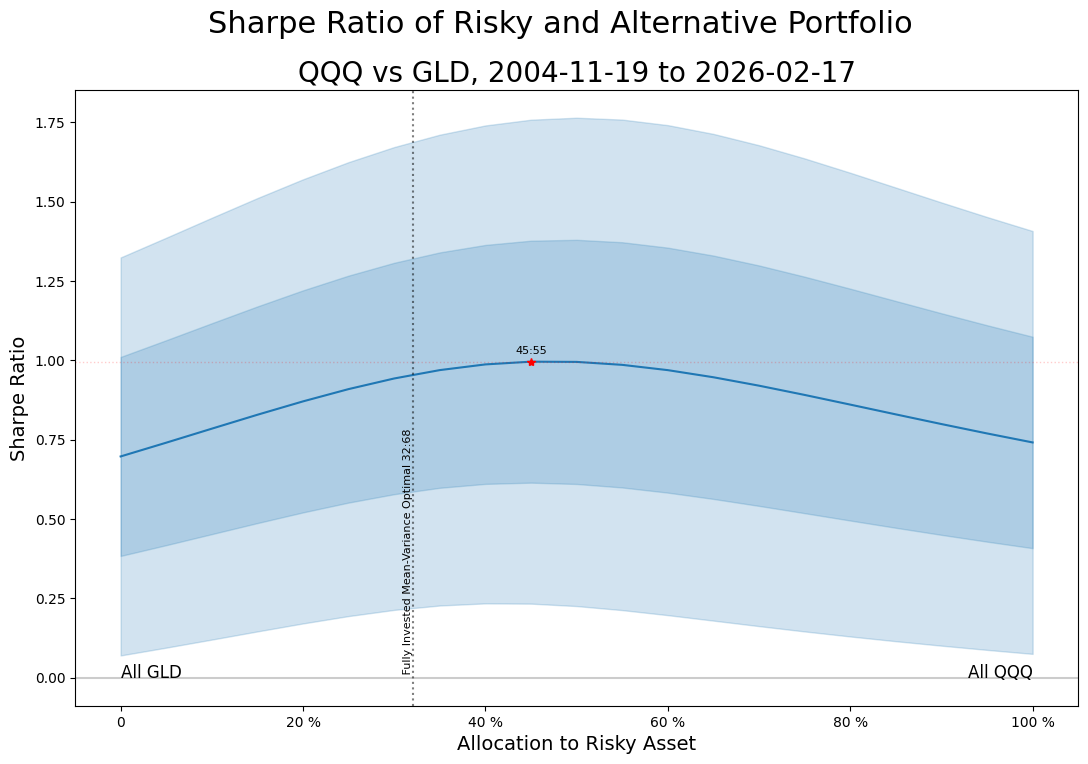

In [13]:
figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
plot.plot((x:=report.index.to_numpy())*hundred,y:=report.loc[x,'Sharpe'].to_numpy())
plot.fill_between(x*hundred,y+(ye:=report.loc[x,'Sharpe S.E.']),y-ye,color='C0',alpha=0.2)
plot.fill_between(x*hundred,y+two*ye,y-two*ye,color='C0',alpha=0.2)
figure.suptitle(title:='Sharpe Ratio of Risky and Alternative Portfolio',fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlabel('Allocation to Risky Asset',fontsize=14)
plot.set_ylabel('Sharpe Ratio',fontsize=14)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.text(zero,zero,"All "+alternative,fontsize=12,horizontalalignment='left')
plot.text(hundred,zero,"All "+market,fontsize=12,horizontalalignment='right')
plot.axhline(color='black',alpha=0.2)
plot.plot(x[(omega:=y.argmax())]*hundred,y[omega],'r*')
plot.text(x[omega]*hundred,y[omega]*1.02,'%.0f:%.0f' % (x[omega]*hundred,hundred-x[omega]*hundred),fontsize=8,ha='center',va='bottom')
plot.axhline(y[omega],color='red',linestyle=':',linewidth=1,alpha=0.2)
plot.axvline(w1*hundred,color='black',linestyle=':',alpha=0.5)
plot.text(w1*hundred,zero,' Fully Invested Mean-Variance Optimal %.0f:%0.f' % (w1*hundred,w2*hundred),rotation=90,ha='right',va='bottom',fontsize=8)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

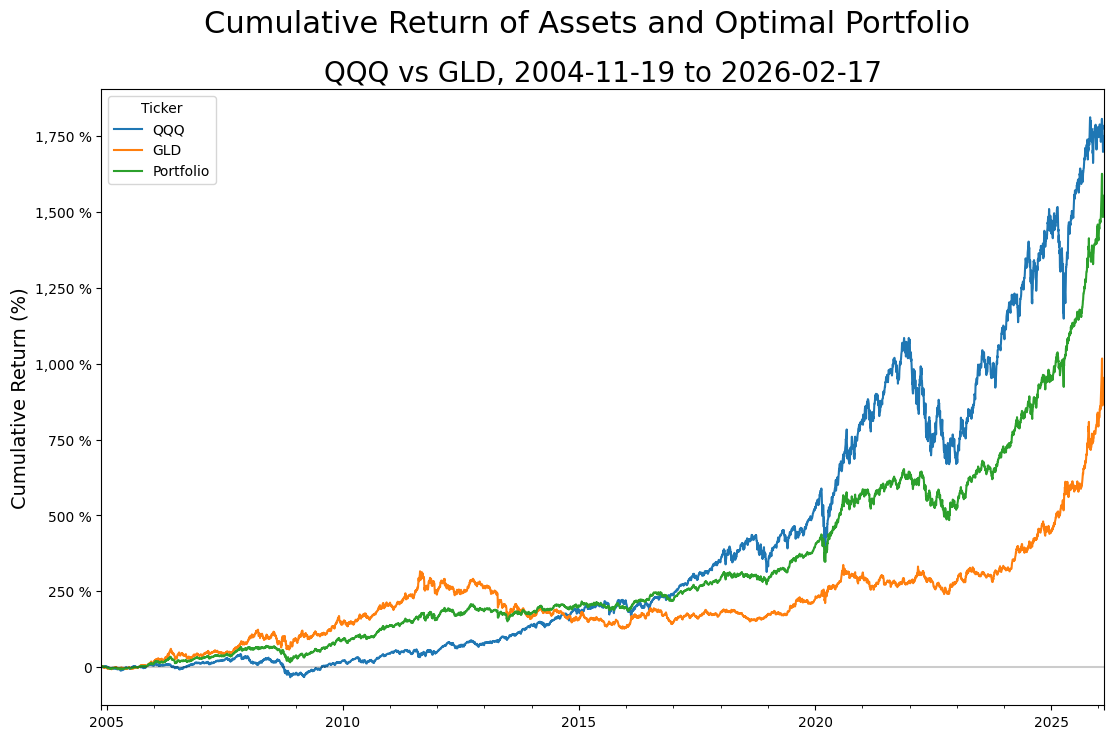

In [14]:
weight=x[y.argmax()]

for ticker in tickers:
    data[('Weight',ticker)]=report.loc[weight,ticker]

data.drop(('Return','Portfolio'),axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)
data[('Cumulative','Portfolio')]=(data[('Return','Portfolio')]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and Optimal Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

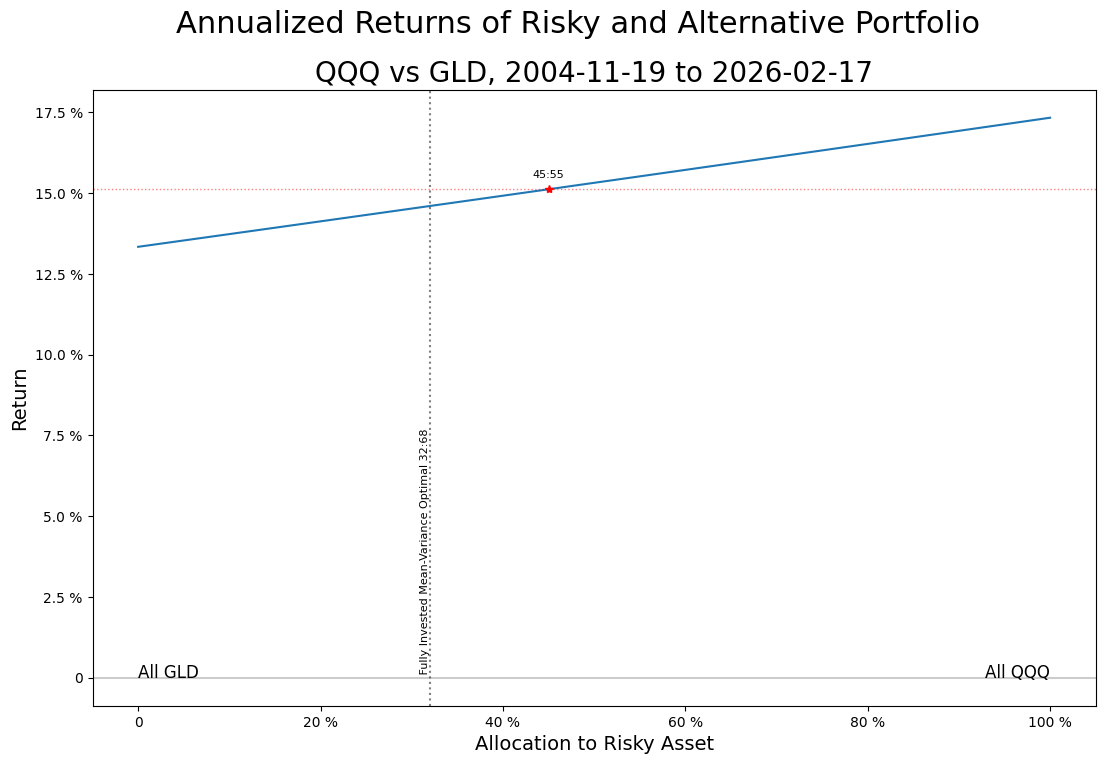

In [15]:
figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
plot.plot((x:=report.index.to_numpy())*hundred,y:=report.loc[x,'Annualized'].to_numpy())
figure.suptitle(title:='Annualized Returns of Risky and Alternative Portfolio',fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlabel('Allocation to Risky Asset',fontsize=14)
plot.set_ylabel('Return',fontsize=14)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.text(zero,zero,"All "+alternative,fontsize=12,horizontalalignment='left')
plot.text(hundred,zero,"All "+market,fontsize=12,horizontalalignment='right')
plot.axhline(color='black',alpha=0.2)
plot.plot(x[omega]*hundred,y[omega],'r*')
plot.text(x[omega]*hundred,y[omega]*1.02,'%.0f:%.0f' % (x[omega]*hundred,hundred-x[omega]*hundred),fontsize=8,ha='center',va='bottom')
plot.axvline(w1*hundred,color='black',linestyle=':',alpha=0.5)
plot.text(w1*hundred,zero,' Fully Invested Mean-Variance Optimal %.0f:%0.f' % (w1*hundred,w2*hundred),rotation=90,ha='right',va='bottom',fontsize=8)
plot.axhline(y[omega],color='red',linestyle=':',linewidth=1,alpha=0.5)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')